# Système de recommandation de compétences en LinkedIn


---

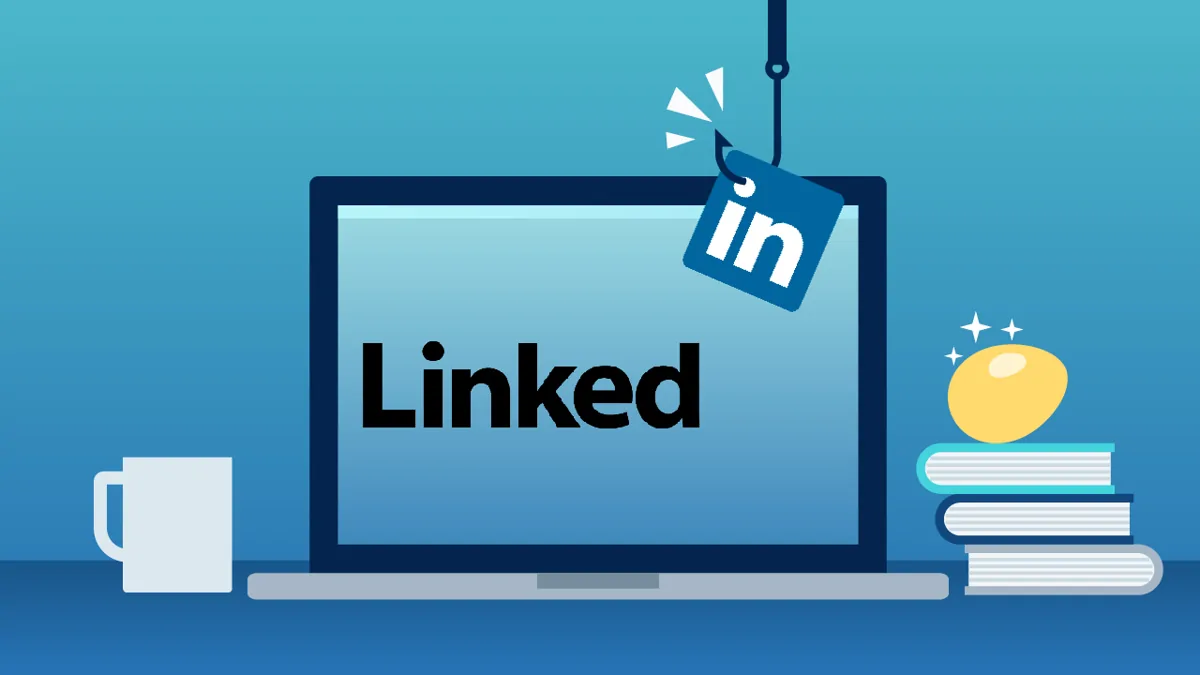

---

## Part 1 : Preprocessing part

### A - Explore Data 

---

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [128]:
data_frame = pd.read_json('dataset_linkedin.json')
data_frame.head()

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills
0,Makram Ben Amor,Data Engineer at CELFOCUS,Plus de 500,"Lisbonne, Lisbonne, Portugal",Celfocus,avr. 2021 – Aujourd’hui,KTH Royal Institute of Technology,"[Data Analytics, Python (Programming Language)..."
1,Nermine ALI,Data Scientist at XQuant,Plus de 500,"Tunis, Tunisie",XQuant,juin 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Machine learning, Java, Parler en public, NLP..."
2,Nisrine Hammout,Data scientist @ Speys,Plus de 500,"Paris, Île-de-France, France",Rise Uganda,sept. 2020 – Aujourd’hui,SIGMA Clermont,"[R, Amazon Web Services (AWS), SQL, Statistica..."
3,Mahri Mohamed amine Recherche Active,Data analyst,289,Tunisie,Gama,juil. 2020 – Aujourd’hui,faculter de science de bizert,[]
4,Mathilde Bleu,Data Scientist à Artefact,322,France,IBM,janv. 2021 – Aujourd’hui,University College London,"[Matlab, Python, Mathematics, Physics, Fluid M..."


In [129]:
#Data Length
data_frame.shape

(2204, 8)

In [130]:
data_frame.columns

Index(['Profile Name', 'Profile Title', 'Relation', 'Pays', 'Last Experience',
       'Date', 'Formation', 'Skills'],
      dtype='object')

In [131]:
#Data description
data_frame.describe()

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills
count,2204,2204,2204,2204,2204,2204,2204,2204
unique,1895,1604,369,340,1278,268,784,1845
top,yessine bessrour,Data Scientist,Plus de 500,"Tunis, Tunisie",No experience,févr. 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,[]
freq,5,126,1669,485,53,112,237,65


In [132]:
#Columns info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Profile Name     2204 non-null   object
 1   Profile Title    2204 non-null   object
 2   Relation         2204 non-null   object
 3   Pays             2204 non-null   object
 4   Last Experience  2204 non-null   object
 5   Date             2204 non-null   object
 6   Formation        2204 non-null   object
 7   Skills           2204 non-null   object
dtypes: object(8)
memory usage: 137.9+ KB


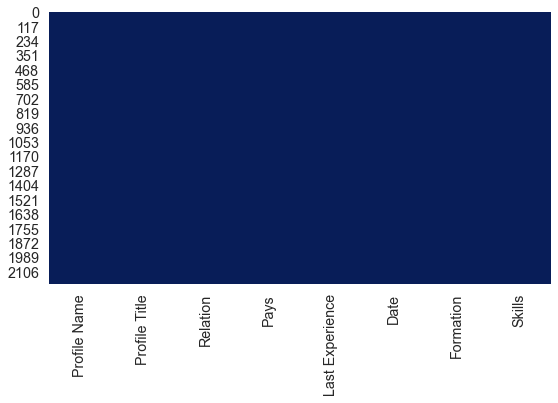

In [133]:
#Finding Missing Values

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(data_frame.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [134]:
x = data_frame[data_frame.duplicated(subset="Profile Name")]
x.shape

(309, 8)

In [135]:
# Finding Duplicated Lines

data_frame['Profile Name'].value_counts()

yessine bessrour    5
Aymen Bejaoui       4
Yosr Masmoudi       4
Hiba Kefi           4
Jebali Amal         4
                   ..
SHRAYANSH YADAV     1
Paul Messinesi      1
Rong Zou            1
Malek Naski         1
Nour Mchela         1
Name: Profile Name, Length: 1895, dtype: int64

In [136]:
#Remove Duplicated Lines

data_frame = data_frame.drop_duplicates(subset="Profile Name", keep='first')

---

### B - Data Transformation

---

In [137]:
data_frame.head()

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills
0,Makram Ben Amor,Data Engineer at CELFOCUS,Plus de 500,"Lisbonne, Lisbonne, Portugal",Celfocus,avr. 2021 – Aujourd’hui,KTH Royal Institute of Technology,"[Data Analytics, Python (Programming Language)..."
1,Nermine ALI,Data Scientist at XQuant,Plus de 500,"Tunis, Tunisie",XQuant,juin 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Machine learning, Java, Parler en public, NLP..."
2,Nisrine Hammout,Data scientist @ Speys,Plus de 500,"Paris, Île-de-France, France",Rise Uganda,sept. 2020 – Aujourd’hui,SIGMA Clermont,"[R, Amazon Web Services (AWS), SQL, Statistica..."
3,Mahri Mohamed amine Recherche Active,Data analyst,289,Tunisie,Gama,juil. 2020 – Aujourd’hui,faculter de science de bizert,[]
4,Mathilde Bleu,Data Scientist à Artefact,322,France,IBM,janv. 2021 – Aujourd’hui,University College London,"[Matlab, Python, Mathematics, Physics, Fluid M..."


In [138]:
data_frame.shape

(1895, 8)

### Column 'Skills'

In [139]:
#Rows with No Skills

data_frame[data_frame.astype(str)['Skills'] == '[]']


,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills
3,Mahri Mohamed amine Recherche Active,Data analyst,289,Tunisie,Gama,juil. 2020 – Aujourd’hui,faculter de science de bizert,[]
43,Irina Platonova,Data Scientist at LabelMe,Plus de 500,France,,mars 2019 – Aujourd’hui,MGUniversity,[]
81,Sihem A.,Data Scientist chez ContentSquare,275,"Paris, Île-de-France, France",ContentSquare,janv. 2018 – Aujourd’hui,Université Paris-Saclay,[]
124,Antonin Meyer,Data Scientist at IQVIA,196,"Paris, Île-de-France, France",No experience,0,MINES ParisTech,[]
130,Manish Joshi,Machine Learning Engineer at ByteDance,Plus de 500,Singapour,ByteDance,févr. 2021 – Aujourd’hui,"Indian Institute of Technology, Bombay",[]
132,Flavien Leveque,Data Scientist chez EXPLORE,190,France,EXPLORE,mai 2021 – Aujourd’hui,Ecole nationale de la Statistique et de l'Anal...,[]
149,Ibtihel Bouaziz,Data Analyst chez SOCIETE TUNISIENNE DE BANQUE,291,"Monastir, Tunisie",SOCIETE TUNISIENNE DE BANQUE,avr. 2018 – Aujourd’hui,Institut Supérieur des Sciences Appliquées et ...,[]
182,Marc-Antoine Vandenhove,Data Scientist at Illuin Technology,Plus de 500,France,Illuin Technology,2019 – Aujourd’hui,CentraleSupelec,[]
277,Florent Geslin,Machine Learning Engineer chez NEOXIA,143,"Paris, Île-de-France, France",NEOXIA,sept. 2019 – Aujourd’hui,Grenoble INP - Ensimag,[]
282,Naima CHATTAT,Data Scientist intern / e-santé / open to work,Plus de 500,France,MYPL,avr. 2021 – Aujourd’hui,Université Sorbonne Paris Nord,[]


In [140]:
#Remove Rows with empty Skills

data_frame = data_frame[data_frame.astype(str)['Skills'] != '[]']
data_frame.head()

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills
0,Makram Ben Amor,Data Engineer at CELFOCUS,Plus de 500,"Lisbonne, Lisbonne, Portugal",Celfocus,avr. 2021 – Aujourd’hui,KTH Royal Institute of Technology,"[Data Analytics, Python (Programming Language)..."
1,Nermine ALI,Data Scientist at XQuant,Plus de 500,"Tunis, Tunisie",XQuant,juin 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Machine learning, Java, Parler en public, NLP..."
2,Nisrine Hammout,Data scientist @ Speys,Plus de 500,"Paris, Île-de-France, France",Rise Uganda,sept. 2020 – Aujourd’hui,SIGMA Clermont,"[R, Amazon Web Services (AWS), SQL, Statistica..."
4,Mathilde Bleu,Data Scientist à Artefact,322,France,IBM,janv. 2021 – Aujourd’hui,University College London,"[Matlab, Python, Mathematics, Physics, Fluid M..."
5,Hedi Ben Mustapha,Senior Data officer at IMPACT Initiatives,451,"Tunis, Tunisie",MASS Analytics,janv. 2021 – Aujourd’hui,SMU - South Mediterranean University (MSB- Med...,"[R, Data Analytics, Machine Learning, Scrum, D..."


In [141]:
data_frame.shape

(1841, 8)

### Column 'Relation'

In [142]:
data_frame['Relation'] = data_frame['Relation'].replace("Plus de 500","500")
data_frame['Relation']

0       500
1       500
2       500
4       322
5       451
       ... 
2199    500
2200    500
2201    500
2202    500
2203    500
Name: Relation, Length: 1841, dtype: object

In [143]:
data_frame['Relation'] = data_frame['Relation'].str.replace("\u202f","")
data_frame['Relation']


0       500
1       500
2       500
4       322
5       451
       ... 
2199    500
2200    500
2201    500
2202    500
2203    500
Name: Relation, Length: 1841, dtype: object

In [144]:
data_frame.isnull().sum()

Profile Name       0
Profile Title      0
Relation           0
Pays               0
Last Experience    0
Date               0
Formation          0
Skills             0
dtype: int64

In [145]:
data_frame['Relation'] = pd.to_numeric(data_frame['Relation'])
data_frame['Relation']

0       500
1       500
2       500
4       322
5       451
       ... 
2199    500
2200    500
2201    500
2202    500
2203    500
Name: Relation, Length: 1841, dtype: int64

In [146]:
data_frame['Relation'] = data_frame[['Relation']].astype(int)
data_frame['Relation']

0       500
1       500
2       500
4       322
5       451
       ... 
2199    500
2200    500
2201    500
2202    500
2203    500
Name: Relation, Length: 1841, dtype: int32

### Column 'Pays'

In [147]:
data_frame['Pays'].value_counts()

Tunis, Tunisie                               362
France                                       228
Tunisie                                      158
Paris, Île-de-France, France                 101
Paris et périphérie                           99
                                            ... 
Passau, Bavière, Allemagne                     1
Ottawa, Ontario, Canada                        1
Asnières-sur-Seine, Île-de-France, France      1
Lynnwood, Washington, États-Unis               1
Madrid, Communauté de Madrid, Espagne          1
Name: Pays, Length: 339, dtype: int64

In [148]:
data_frame.loc[data_frame['Pays'].str.contains('France'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Paris'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Allemagne'), 'Pays'] = 'Allemagne'
data_frame.loc[data_frame['Pays'].str.contains('Royaume-Uni'), 'Pays'] = 'Royaume-Uni'
data_frame.loc[data_frame['Pays'].str.contains('Inde'), 'Pays'] = 'Inde'
data_frame.loc[data_frame['Pays'].str.contains('Tunis'), 'Pays'] = 'Tunisie'
data_frame.loc[data_frame['Pays'].str.contains('Maroc'), 'Pays'] = 'Maroc'
data_frame.loc[data_frame['Pays'].str.contains('Pays-Bas'), 'Pays'] = 'Pays-Bas'
data_frame.loc[data_frame['Pays'].str.contains('Montpellier'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Suisse'), 'Pays'] = 'Suisse'
data_frame.loc[data_frame['Pays'].str.contains('Sfax'), 'Pays'] = 'Tunisie'
data_frame.loc[data_frame['Pays'].str.contains('Lyon'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Pologne'), 'Pays'] = 'Pologne'
data_frame.loc[data_frame['Pays'].str.contains('Lille'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('New York'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Biélorussie'), 'Pays'] = 'Biélorussie'
data_frame.loc[data_frame['Pays'].str.contains('Casablanca'), 'Pays'] = 'Maroc'
data_frame.loc[data_frame['Pays'].str.contains('Rabat '), 'Pays'] = 'Maroc'
data_frame.loc[data_frame['Pays'].str.contains('Espagne'), 'Pays'] = 'Espagne'
data_frame.loc[data_frame['Pays'].str.contains('Afrique du Sud'), 'Pays'] = 'Afrique du Sud'
data_frame.loc[data_frame['Pays'].str.contains('Tunisie'), 'Pays'] = 'Tunisie'
data_frame.loc[data_frame['Pays'].str.contains('Turquie'), 'Pays'] = 'Turquie'
data_frame.loc[data_frame['Pays'].str.contains('Émirats arabes unis'), 'Pays'] = 'Émirats arabes unis'
data_frame.loc[data_frame['Pays'].str.contains('Égypte'), 'Pays'] = 'Égypte'
data_frame.loc[data_frame['Pays'].str.contains('Iran'), 'Pays'] = 'Iran'
data_frame.loc[data_frame['Pays'].str.contains('États-Unis'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Cameroun'), 'Pays'] = 'Cameroun'
data_frame.loc[data_frame['Pays'].str.contains('Corée du Sud'), 'Pays'] = 'Corée du Sud'
data_frame.loc[data_frame['Pays'].str.contains('Toronto'), 'Pays'] = 'Canada'
data_frame.loc[data_frame['Pays'].str.contains('Vienne'), 'Pays'] = 'Autriche'
data_frame.loc[data_frame['Pays'].str.contains('Charleroi'), 'Pays'] = 'Belgique'
data_frame.loc[data_frame['Pays'].str.contains('Wezembeek-Oppem'), 'Pays'] = 'Belgique'
data_frame.loc[data_frame['Pays'].str.contains('Brésil'), 'Pays'] = 'Brésil'
data_frame.loc[data_frame['Pays'].str.contains('Dallas'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Bordeaux'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Canada'), 'Pays'] = 'Canada'
data_frame.loc[data_frame['Pays'].str.contains('Australie'), 'Pays'] = 'Australie'
data_frame.loc[data_frame['Pays'].str.contains('Norvège'), 'Pays'] = 'Norvège'
data_frame.loc[data_frame['Pays'].str.contains('Chine'), 'Pays'] = 'Chine'
data_frame.loc[data_frame['Pays'].str.contains('Jordanie'), 'Pays'] = 'Jordanie'
data_frame.loc[data_frame['Pays'].str.contains('Brésil'), 'Pays'] = 'Brésil'
data_frame.loc[data_frame['Pays'].str.contains('Belgique'), 'Pays'] = 'Belgique'
data_frame.loc[data_frame['Pays'].str.contains('Pakistan'), 'Pays'] = 'Pakistan'
data_frame.loc[data_frame['Pays'].str.contains('Italie'), 'Pays'] = 'Italie'
data_frame.loc[data_frame['Pays'].str.contains('Irlande'), 'Pays'] = 'Irlande'
data_frame.loc[data_frame['Pays'].str.contains('Sénégal'), 'Pays'] = 'Sénégal'
data_frame.loc[data_frame['Pays'].str.contains('Somalie'), 'Pays'] = 'Somalie'
data_frame.loc[data_frame['Pays'].str.contains('Hongrie'), 'Pays'] = 'Hongrie'
data_frame.loc[data_frame['Pays'].str.contains('Burkina'), 'Pays'] = 'Burkina'
data_frame.loc[data_frame['Pays'].str.contains('Russie'), 'Pays'] = 'Russie'
data_frame.loc[data_frame['Pays'].str.contains('Portugal'), 'Pays'] = 'Portugal'
data_frame.loc[data_frame['Pays'].str.contains('Dehli'), 'Pays'] = 'Inde'
data_frame.loc[data_frame['Pays'].str.contains('Hongrie'), 'Pays'] = 'Hongrie'
data_frame.loc[data_frame['Pays'].str.contains('Singapour'), 'Pays'] = 'Singapour'
data_frame.loc[data_frame['Pays'].str.contains('Lituanie'), 'Pays'] = 'Lituanie'
data_frame.loc[data_frame['Pays'].str.contains('Viêt Nam'), 'Pays'] = 'Viêt Nam'
data_frame.loc[data_frame['Pays'].str.contains('Roumanie'), 'Pays'] = 'Roumanie'
data_frame.loc[data_frame['Pays'].str.contains('Nice'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Arménie'), 'Pays'] = 'Arménie'
data_frame.loc[data_frame['Pays'].str.contains('Toronto'), 'Pays'] = 'Canada'
data_frame.loc[data_frame['Pays'].str.contains('Toronto'), 'Pays'] = 'Canada'
data_frame.loc[data_frame['Pays'].str.contains('Toronto'), 'Pays'] = 'Canada'
data_frame.loc[data_frame['Pays'].str.contains('Berlin'), 'Pays'] = 'Allemagne'
data_frame.loc[data_frame['Pays'].str.contains('San Francisco'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Bangladesh'), 'Pays'] = 'Bangladesh'
data_frame.loc[data_frame['Pays'].str.contains('Toulouse'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Cracovie '), 'Pays'] = 'Pologne'
data_frame.loc[data_frame['Pays'].str.contains('Seattle'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Genève'), 'Pays'] = 'Suisse'
data_frame.loc[data_frame['Pays'].str.contains('palestinienne'), 'Pays'] = 'Palestine'
data_frame.loc[data_frame['Pays'].str.contains('Limoges'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Strasbourg'), 'Pays'] = 'France'
data_frame.loc[data_frame['Pays'].str.contains('Denver'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Nigéria'), 'Pays'] = 'Nigéria'
data_frame.loc[data_frame['Pays'].str.contains('Francfort'), 'Pays'] = 'Allemagne'
data_frame.loc[data_frame['Pays'].str.contains('Brisbane'), 'Pays'] = 'Australie'
data_frame.loc[data_frame['Pays'].str.contains('Mito-Hitachi'), 'Pays'] = 'Japan'
data_frame.loc[data_frame['Pays'].str.contains('Bangalore'), 'Pays'] = 'Inde'
data_frame.loc[data_frame['Pays'].str.contains('Jakarta'), 'Pays'] = 'Inde'
data_frame.loc[data_frame['Pays'].str.contains('Padoue'), 'Pays'] = 'Italie'
data_frame.loc[data_frame['Pays'].str.contains('Madison'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Washington'), 'Pays'] = 'États-Unis'
data_frame.loc[data_frame['Pays'].str.contains('Bonn'), 'Pays'] = 'Allemagne'
data_frame.loc[data_frame['Pays'].str.contains('Marseille'), 'Pays'] = 'France'

data_frame['Pays'].value_counts()



Tunisie                997
France                 550
Inde                    46
Allemagne               45
États-Unis              39
Égypte                  16
Royaume-Uni             14
Maroc                   13
Canada                  12
Pakistan                 9
Pologne                  6
Bangladesh               6
Iran                     6
Pays-Bas                 6
Suisse                   5
Chine                    4
Émirats arabes unis      4
Brésil                   4
Singapour                4
Belgique                 4
Biélorussie              3
Turquie                  3
Arménie                  3
Espagne                  3
Italie                   2
Sénégal                  2
Corée du Sud             2
Suède                    2
Australie                2
Nigéria                  2
Cameroun                 2
Portugal                 2
Irlande                  1
Japan                    1
Roumanie                 1
Jordanie                 1
Lituanie                 1
A

### Adding New Column 'Have_Job' Based on Date 

In [149]:
data_frame.head()

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills
0,Makram Ben Amor,Data Engineer at CELFOCUS,500,Portugal,Celfocus,avr. 2021 – Aujourd’hui,KTH Royal Institute of Technology,"[Data Analytics, Python (Programming Language)..."
1,Nermine ALI,Data Scientist at XQuant,500,Tunisie,XQuant,juin 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Machine learning, Java, Parler en public, NLP..."
2,Nisrine Hammout,Data scientist @ Speys,500,France,Rise Uganda,sept. 2020 – Aujourd’hui,SIGMA Clermont,"[R, Amazon Web Services (AWS), SQL, Statistica..."
4,Mathilde Bleu,Data Scientist à Artefact,322,France,IBM,janv. 2021 – Aujourd’hui,University College London,"[Matlab, Python, Mathematics, Physics, Fluid M..."
5,Hedi Ben Mustapha,Senior Data officer at IMPACT Initiatives,451,Tunisie,MASS Analytics,janv. 2021 – Aujourd’hui,SMU - South Mediterranean University (MSB- Med...,"[R, Data Analytics, Machine Learning, Scrum, D..."


In [150]:
data_frame['Have_Job'] = np.where(((data_frame['Date'].str.contains('Aujourd’hui')) & (data_frame['Date'] != 0)), 1, 0)
data_frame.head()

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills,Have_Job
0,Makram Ben Amor,Data Engineer at CELFOCUS,500,Portugal,Celfocus,avr. 2021 – Aujourd’hui,KTH Royal Institute of Technology,"[Data Analytics, Python (Programming Language)...",1
1,Nermine ALI,Data Scientist at XQuant,500,Tunisie,XQuant,juin 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Machine learning, Java, Parler en public, NLP...",1
2,Nisrine Hammout,Data scientist @ Speys,500,France,Rise Uganda,sept. 2020 – Aujourd’hui,SIGMA Clermont,"[R, Amazon Web Services (AWS), SQL, Statistica...",1
4,Mathilde Bleu,Data Scientist à Artefact,322,France,IBM,janv. 2021 – Aujourd’hui,University College London,"[Matlab, Python, Mathematics, Physics, Fluid M...",1
5,Hedi Ben Mustapha,Senior Data officer at IMPACT Initiatives,451,Tunisie,MASS Analytics,janv. 2021 – Aujourd’hui,SMU - South Mediterranean University (MSB- Med...,"[R, Data Analytics, Machine Learning, Scrum, D...",1


In [151]:
data_frame['Have_Job'].value_counts()

1    1560
0     281
Name: Have_Job, dtype: int64

In [152]:
data_frame[data_frame['Formation'].str.contains("ESC Tunis",  na=False)]

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills,Have_Job
428,Hedi Manai,Data Scientist chez Tunisian Cloud,500,Tunisie,Tunisian Cloud,déc. 2019 – Aujourd’hui,ESC Tunis,"[Python, MongoDB, Data Warehouse, Développemen...",1
452,Homrani Bilel,Data analyst chez LLOYD ASSURANCES,214,Tunisie,LLOYD ASSURANCES,mars 2018 – Aujourd’hui,ESC Tunis,"[ETL, Extraire, transformer, charger (ETL), Or...",1
710,Mouez Hamdaoui,Consultant BI | Data Analyst,178,Tunisie,Sté HMS,mars 2019 – sept. 2019,ESC Tunis,"[Data Warehouse, Extraire, transformer, charge...",0
939,Amira Aouinti,Data Scientist at Convergen,500,Tunisie,Convergen,févr. 2021 – Aujourd’hui,ESC Tunis,"[Python, Statistiques, MongoDB, Mathématiques,...",1
1727,Abdellaziz Mallekh,Data analyst chez LLOYD ASSURANCES,500,Tunisie,LLOYD ASSURANCES,juin 2020 – Aujourd’hui,ESC Tunis,"[Power bi, MDX, Microsoft SQL Server, SQL Serv...",1
1729,Wassim Guesmi,Consultant Business Intelligence & Data Analys...,500,Tunisie,PwC France,janv. 2021 – Aujourd’hui,ESC Tunis,"[SQL, Java, Analyse de données, Économétrie, V...",1
1745,Hela Sayari,Data Base Analyst,216,Tunisie,WeeMixt,janv. 2020 – févr. 2021,ESC Tunis,"[Data Analysis, Data Visualization, Data Model...",0
1752,Dhaker Ouerghemmi,Expert Data Analyst at GIZ Tunisie,452,Tunisie,GIZ Tunisie,avr. 2021 – Aujourd’hui,ESC Tunis,"[Gestion de projet, SQL, Microsoft Office, Sta...",1


---

## Part 2 : Visualization part

---

<AxesSubplot:title={'center':'Barplot'}, xlabel='Have_Job', ylabel='Have_Job Value Count'>

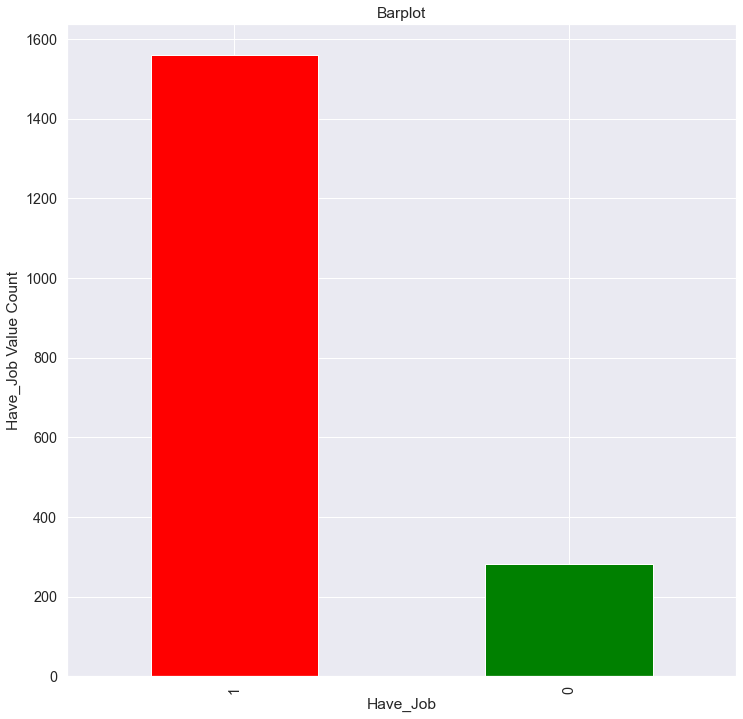

In [153]:
#Barplot 'Have_Job' Column

plt.xlabel('Have_Job')
plt.ylabel('Have_Job Value Count')
plt.title('Barplot')

counts = data_frame['Have_Job'].value_counts()
counts.plot.bar(color=['red','green'])

In [154]:
data_frame['Formation'].value_counts()

Ecole Supérieure Privée d'Ingénierie et de Technologies - ESPRIT       193
National Institute of Applied Science and Technology                    54
École Supérieure de la Statistique et de l'Analyse de l'Information     44
SUP'COM                                                                 43
ENSI - Ecole Nationale des Sciences de l'Informatique                   35
                                                                      ... 
CY Tech                                                                  1
Uniwersytet Warszawski                                                   1
Université de Moncton                                                    1
Institut supérieur d'informatique (ISI)                                  1
Majhighariani Institute of Technology and Science (MITS), Rayagada       1
Name: Formation, Length: 767, dtype: int64

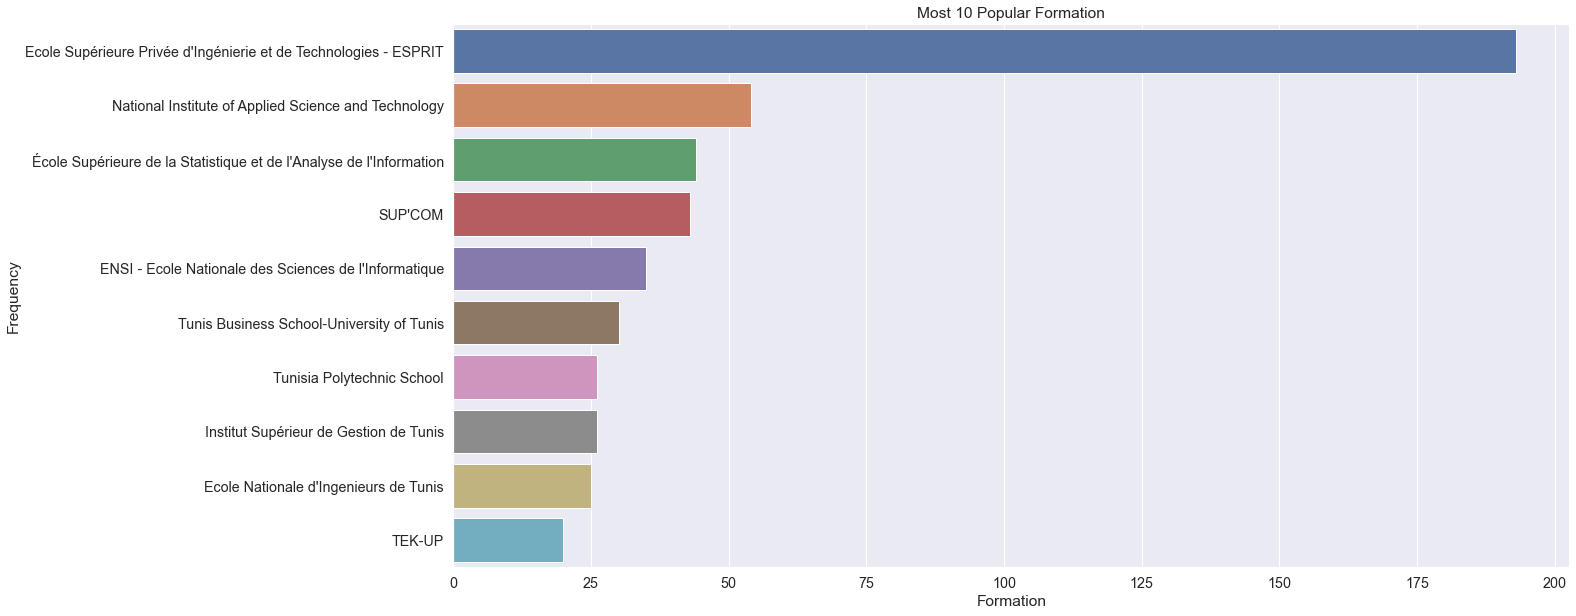

In [155]:
#Plotting Most frequency Formation

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame['Formation'].value_counts().head(10), y=data_frame['Formation'].value_counts().head(10).index)
plt.ylabel('Frequency')
plt.title('Most 10 Popular Formation')
sns.set(font_scale=1.3)
plt.show()

In [156]:
data_frame['Pays'].value_counts().head(15)

Tunisie        997
France         550
Inde            46
Allemagne       45
États-Unis      39
Égypte          16
Royaume-Uni     14
Maroc           13
Canada          12
Pakistan         9
Pologne          6
Bangladesh       6
Iran             6
Pays-Bas         6
Suisse           5
Name: Pays, dtype: int64

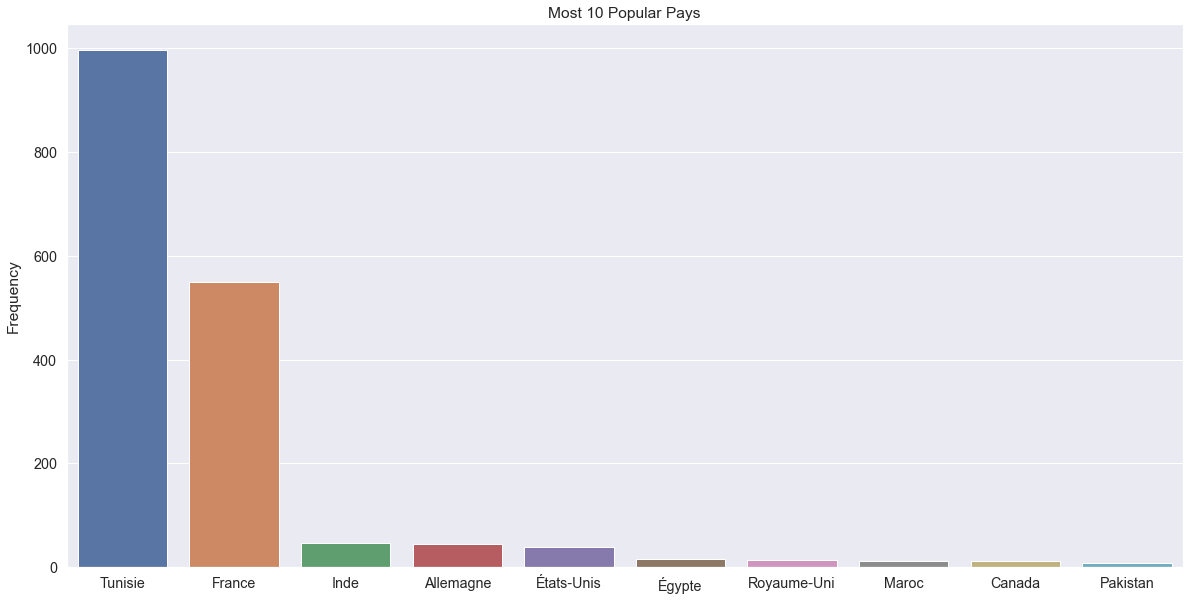

In [157]:
#Plotting Most frequency Pays 

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame['Pays'].value_counts().head(10).index, y=data_frame['Pays'].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most 10 Popular Pays')
sns.set(font_scale=1.3)
plt.show()

In [158]:
data_frame['Last Experience'].value_counts().head(15)

No experience       47
Freelance           15
Infor               14
Ooredoo Tunisie     13
Tunisie Télécom     11
BIAT                11
Apple               10
axefinance           9
ELYADATA             9
Creativ-Ceutical     9
Orange Tunisie       8
Indépendant          8
SESAMm               8
Cognira              8
Value                8
Name: Last Experience, dtype: int64

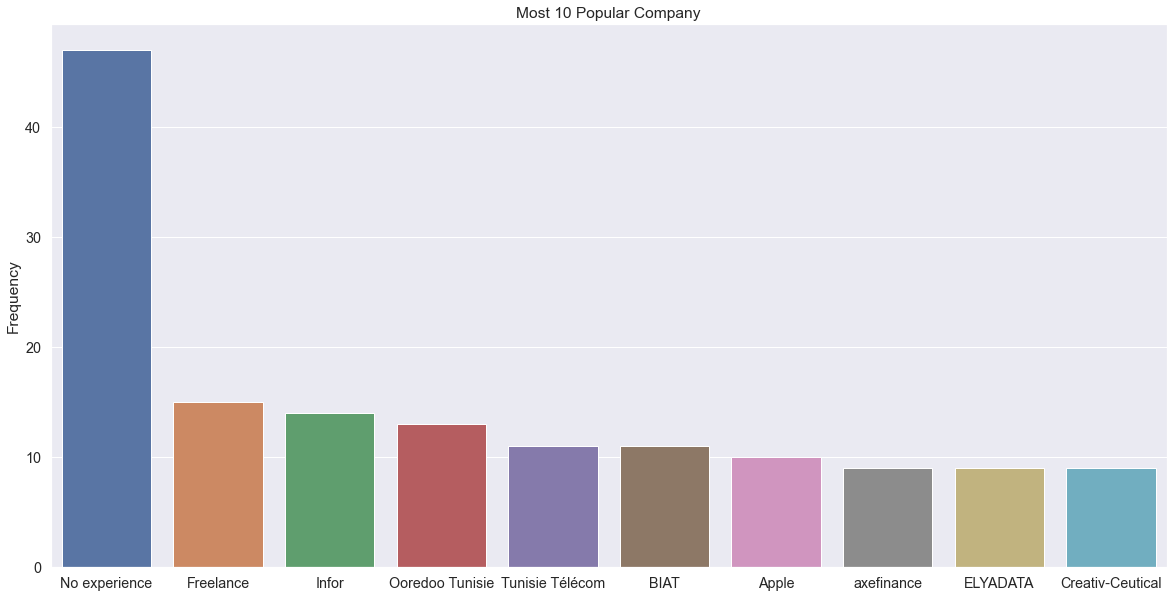

In [159]:
#Plotting Most frequency Company 

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame['Last Experience'].value_counts().head(10).index, y=data_frame['Last Experience'].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most 10 Popular Company')
sns.set(font_scale=1.3)
plt.show()

In [160]:
data_frame['Relation'].value_counts().head()

500    1378
77        4
283       4
458       3
336       3
Name: Relation, dtype: int64

In [161]:
data_frame[data_frame['Formation'].str.contains('ESC Tunis')]

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills,Have_Job
428,Hedi Manai,Data Scientist chez Tunisian Cloud,500,Tunisie,Tunisian Cloud,déc. 2019 – Aujourd’hui,ESC Tunis,"[Python, MongoDB, Data Warehouse, Développemen...",1
452,Homrani Bilel,Data analyst chez LLOYD ASSURANCES,214,Tunisie,LLOYD ASSURANCES,mars 2018 – Aujourd’hui,ESC Tunis,"[ETL, Extraire, transformer, charger (ETL), Or...",1
710,Mouez Hamdaoui,Consultant BI | Data Analyst,178,Tunisie,Sté HMS,mars 2019 – sept. 2019,ESC Tunis,"[Data Warehouse, Extraire, transformer, charge...",0
939,Amira Aouinti,Data Scientist at Convergen,500,Tunisie,Convergen,févr. 2021 – Aujourd’hui,ESC Tunis,"[Python, Statistiques, MongoDB, Mathématiques,...",1
1727,Abdellaziz Mallekh,Data analyst chez LLOYD ASSURANCES,500,Tunisie,LLOYD ASSURANCES,juin 2020 – Aujourd’hui,ESC Tunis,"[Power bi, MDX, Microsoft SQL Server, SQL Serv...",1
1729,Wassim Guesmi,Consultant Business Intelligence & Data Analys...,500,Tunisie,PwC France,janv. 2021 – Aujourd’hui,ESC Tunis,"[SQL, Java, Analyse de données, Économétrie, V...",1
1745,Hela Sayari,Data Base Analyst,216,Tunisie,WeeMixt,janv. 2020 – févr. 2021,ESC Tunis,"[Data Analysis, Data Visualization, Data Model...",0
1752,Dhaker Ouerghemmi,Expert Data Analyst at GIZ Tunisie,452,Tunisie,GIZ Tunisie,avr. 2021 – Aujourd’hui,ESC Tunis,"[Gestion de projet, SQL, Microsoft Office, Sta...",1


In [162]:
data_frame[data_frame['Relation'] > 1000]

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills,Have_Job
50,Yacine Haddam,Data Scientist Consultant at Capgemini Invent ...,3056,France,Capgemini Invent,juin 2018 – Aujourd’hui,Telecom ParisTech,"[Supply Chain Management, Project Management, ...",1
72,Mohamed Anis RACHDI,✓Financial Analyst ✓Data Analyst ✓Big Data Con...,1322,Tunisie,BH Bank,janv. 2019 – Aujourd’hui,Institut De Financement Du Développement Du Ma...,"[Microsoft Excel, Microsoft Power BI, Visual B...",1
123,Suraz G.,Senior Data Engineer at Cloud Untitled,11593,États-Unis,Cloud Untitled,mars 2020 – Aujourd’hui,Majhighariani Institute of Technology and Scie...,"[Hadoop, Apache Spark, Java, SQL, Scala, MapRe...",1
136,Ala Eddine アラジン AYADI,Data Scientist at LVMH,13634,France,LVMH,mars 2020 – Aujourd’hui,Università degli Studi di Padova,"[Deep Learning, Big Data, machine learning, Cl...",1
191,Nidhal SAADAOUI,Big Data Engineer at HIGHFI,1201,Tunisie,HIGHFI,mai 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Apache Spark, Cloudera, Scala, Big Data, Data...",1
...,...,...,...,...,...,...,...,...,...
1883,Rabeb Ouertani,Electrical & Industrial Computing|| Data Analy...,1410,Tunisie,Pm_Industries,mai 2018 – oct. 2019,Université Libre de Tunis (ULT),"[Microsoft Office, Design, Génie électrique, A...",0
1897,Mayur Jadhav,Data Analyst | I help people get visible on Li...,45719,Inde,Santander Consumer Bank - Nordics,août 2020 – Aujourd’hui,BI Norwegian Business School,"[Growth Marketing, Digital Marketing, Social M...",1
1898,Alex (Mengyao) Wang,Data Science / Data Analytics,75252,Australie,University of Technology Sydney,mars 2020 – Aujourd’hui,University of Sydney,"[Data Analysis, Python, Communication, SQL, Mi...",1
1915,"Anne Francine Martins, PhD",Data scientist & Économiste | Machine Learning...,7292,France,Éstiam • École supérieure des technologies de ...,nov. 2019 – Aujourd’hui,Arts et Métiers ParisTech - École Nationale Su...,"[Analyse de données, Machine learning, Intelli...",1


In [163]:
data_frame[data_frame['Relation'] > 20000]

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills,Have_Job
214,Houssem Ben Salem,Business Intelligence Developer chez Mantu | D...,24261,Tunisie,ODDO BHF,août 2020 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Data extraction, Data visualization, Data ana...",1
217,Vinodhini S Duraisamy,Data & Applied Machine Learning Engineer,22976,États-Unis,Apple,avr. 2021 – Aujourd’hui,Arizona State University - W. P. Carey School ...,"[Python (Programming Language), MySQL, Machine...",1
637,Sanyam Bhutani,Kaggle Master + x2 Expert (Ranked in Top 1%) |...,21118,Inde,Hacker Noon,janv. 2017 – Aujourd’hui,University of San Francisco,"[Deep Learning, Python, Data Analysis, Machine...",1
1435,Hamed ZITOUN -GCP ML Certified,I share daily about Machine Learning | FLLOW s...,33096,France,Freelance,2017 – Aujourd’hui,ENSEIRB-MATMECA,"[Machine Learning, Python, Big Data, Android D...",1
1897,Mayur Jadhav,Data Analyst | I help people get visible on Li...,45719,Inde,Santander Consumer Bank - Nordics,août 2020 – Aujourd’hui,BI Norwegian Business School,"[Growth Marketing, Digital Marketing, Social M...",1
1898,Alex (Mengyao) Wang,Data Science / Data Analytics,75252,Australie,University of Technology Sydney,mars 2020 – Aujourd’hui,University of Sydney,"[Data Analysis, Python, Communication, SQL, Mi...",1


In [164]:
data_frame.head()

,Profile Name,Profile Title,Relation,Pays,Last Experience,Date,Formation,Skills,Have_Job
0,Makram Ben Amor,Data Engineer at CELFOCUS,500,Portugal,Celfocus,avr. 2021 – Aujourd’hui,KTH Royal Institute of Technology,"[Data Analytics, Python (Programming Language)...",1
1,Nermine ALI,Data Scientist at XQuant,500,Tunisie,XQuant,juin 2021 – Aujourd’hui,Ecole Supérieure Privée d'Ingénierie et de Tec...,"[Machine learning, Java, Parler en public, NLP...",1
2,Nisrine Hammout,Data scientist @ Speys,500,France,Rise Uganda,sept. 2020 – Aujourd’hui,SIGMA Clermont,"[R, Amazon Web Services (AWS), SQL, Statistica...",1
4,Mathilde Bleu,Data Scientist à Artefact,322,France,IBM,janv. 2021 – Aujourd’hui,University College London,"[Matlab, Python, Mathematics, Physics, Fluid M...",1
5,Hedi Ben Mustapha,Senior Data officer at IMPACT Initiatives,451,Tunisie,MASS Analytics,janv. 2021 – Aujourd’hui,SMU - South Mediterranean University (MSB- Med...,"[R, Data Analytics, Machine Learning, Scrum, D...",1


---

## Part 3 : Unsupervised Machine Learning


---

In [165]:
data_frame['Skills']

0       [Data Analytics, Python (Programming Language)...
1       [Machine learning, Java, Parler en public, NLP...
2       [R, Amazon Web Services (AWS), SQL, Statistica...
4       [Matlab, Python, Mathematics, Physics, Fluid M...
5       [R, Data Analytics, Machine Learning, Scrum, D...
                              ...                        
2199    [Machine Learning, Deep Learning, Python, Stat...
2200    [Python, C++, C, data mining, Machine Learning...
2201    [Big Data, Spring Boot, Data Science, Machine ...
2202    [C++, Algorithms, Data Analysis, Data Structur...
2203    [Leadership, Machine Learning, Distributed Sys...
Name: Skills, Length: 1841, dtype: object

In [166]:
skills = pd.DataFrame(data_frame.Skills.values.tolist()).add_prefix('Skill_')
skills.head()

,Skill_0,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,...,Skill_40,Skill_41,Skill_42,Skill_43,Skill_44,Skill_45,Skill_46,Skill_47,Skill_48,Skill_49
0,Data Analytics,Python (Programming Language),MySQL,Data Analysis,Data Visualization,Programming,Machine Learning,Business Analysis,Statistical Data Analysis,Statistics,...,French,NumPy,Data Cleaning,Workbench,Probability,Apache Spark,Muda,HSE Management Systems,None,None
1,Machine learning,Java,Parler en public,NLP,Analyse de données,Business Intelligence,Data warehousing,ETL,Deep learning,Programmation orientée objet (POO),...,None,None,None,None,None,None,None,None,None,None
2,R,Amazon Web Services (AWS),SQL,Statistical Data Analysis,Big Data,Data Analysis,Data Mining,Data Warehousing,Data Management,AWS SageMaker,...,None,None,None,None,None,None,None,None,None,None
3,Matlab,Python,Mathematics,Physics,Fluid Mechanics,Machine Learning,LaTeX,Google Cloud Platform (GCP),Apache Spark,None,...,None,None,None,None,None,None,None,None,None,None
4,R,Data Analytics,Machine Learning,Scrum,Data Mining,Java,Visual Basic,SQL,PHP,Unified Modeling Language (UML),...,None,None,None,None,None,None,None,None,None,None


In [167]:
#Describe Dataset
skills.describe()

,Skill_0,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,...,Skill_40,Skill_41,Skill_42,Skill_43,Skill_44,Skill_45,Skill_46,Skill_47,Skill_48,Skill_49
count,1841,1837,1833,1825,1818,1768,1739,1706,1668,1625,...,272,253,233,217,205,184,163,138,111,80
unique,383,470,522,438,511,544,558,584,581,570,...,208,194,195,167,168,139,129,116,88,67
top,Python,Python,Python,Machine Learning,Analyse de données,Machine Learning,Java,SQL,SQL,SQL,...,Leadership,Apache Spark,Natural Language Processing (NLP),Apache Spark,Apache Spark,Apache Spark,Data Analytics,Apache Spark,Apache Spark,Machine Learning Algorithms
freq,251,143,113,98,61,47,38,42,54,50,...,8,10,5,5,7,9,5,4,6,4


In [168]:
#Data Length
skills.shape

(1841, 50)

In [169]:
skills

,Skill_0,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,...,Skill_40,Skill_41,Skill_42,Skill_43,Skill_44,Skill_45,Skill_46,Skill_47,Skill_48,Skill_49
0,Data Analytics,Python (Programming Language),MySQL,Data Analysis,Data Visualization,Programming,Machine Learning,Business Analysis,Statistical Data Analysis,Statistics,...,French,NumPy,Data Cleaning,Workbench,Probability,Apache Spark,Muda,HSE Management Systems,None,None
1,Machine learning,Java,Parler en public,NLP,Analyse de données,Business Intelligence,Data warehousing,ETL,Deep learning,Programmation orientée objet (POO),...,None,None,None,None,None,None,None,None,None,None
2,R,Amazon Web Services (AWS),SQL,Statistical Data Analysis,Big Data,Data Analysis,Data Mining,Data Warehousing,Data Management,AWS SageMaker,...,None,None,None,None,None,None,None,None,None,None
3,Matlab,Python,Mathematics,Physics,Fluid Mechanics,Machine Learning,LaTeX,Google Cloud Platform (GCP),Apache Spark,None,...,None,None,None,None,None,None,None,None,None,None
4,R,Data Analytics,Machine Learning,Scrum,Data Mining,Java,Visual Basic,SQL,PHP,Unified Modeling Language (UML),...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,Machine Learning,Deep Learning,Python,Statistics,Big Data,"Extract, Transform, Load (ETL)",Data Warehousing,Supply Chain Management,Operations Management,Inventory Management,...,None,None,None,None,None,None,None,None,None,None
1837,Python,C++,C,data mining,Machine Learning,Deep Learning,Computer Vision,Artificial Intelligence (AI),C#,Linux,...,None,None,None,None,None,None,None,None,None,None
1838,Big Data,Spring Boot,Data Science,Machine Learning,Artificial Intelligence (AI),Science des données,Gestion de projet,Développement web,Administration de bases de données,Planification de projets,...,None,None,None,None,None,None,None,None,None,None
1839,C++,Algorithms,Data Analysis,Data Structures,Data Visualization,Machine Learning,Deep Learning,Python,Python (Programming Language),None,...,None,None,None,None,None,None,None,None,None,None


In [170]:
skills.nunique().sort_values(ascending = False).head()

Skill_7     584
Skill_11    581
Skill_8     581
Skill_9     570
Skill_10    560
dtype: int64

* The Column 'Skill_7' has the biggest number of skills. So, we got at least 584 Items in our Data

In [171]:
skills['Skill_0'].value_counts().head(70)

Python                251
Machine Learning      144
Java                   73
R                      72
Analyse de données     48
                     ... 
Mathematics             4
Public Speaking         4
Analyses Big Data       4
Finance                 4
Télécommunications      4
Name: Skill_0, Length: 70, dtype: int64

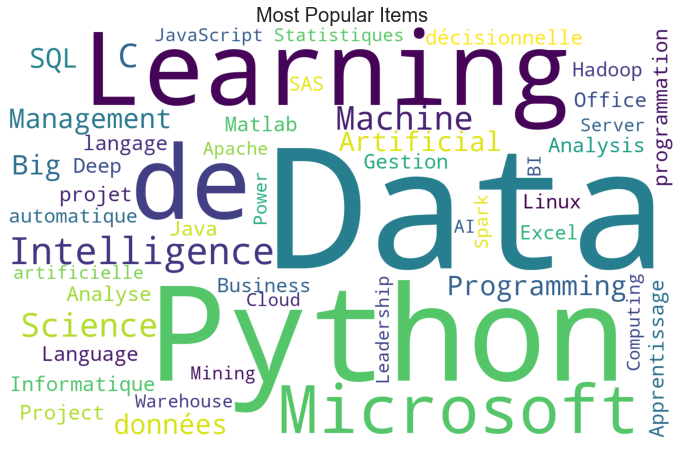

In [172]:
#Using WordCloud

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'white',
                      width = 1600,
                      height = 1000,
                      max_words = 50).generate(str(skills['Skill_0'].value_counts().head(50)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [173]:
list_skills = skills.columns.values.tolist()

skills[list_skills] = skills[list_skills].replace('Python (Programming Language)', 'Python')
skills[list_skills] = skills[list_skills].replace('Python (langage de programmation)', 'Python')
skills[list_skills] = skills[list_skills].replace('python', 'Python')
skills[list_skills] = skills[list_skills].replace('PYTHON', 'Python')

skills[list_skills] = skills[list_skills].replace('Machine learning', 'Machine Learning')
skills[list_skills] = skills[list_skills].replace('machine learning', 'Machine Learning')
skills[list_skills] = skills[list_skills].replace('Apprentissage automatique', 'Machine Learning')
skills[list_skills] = skills[list_skills].replace('MACHINE LEARNING', 'Machine Learning')

skills[list_skills] = skills[list_skills].replace('deep learning', 'Deep Learning')
skills[list_skills] = skills[list_skills].replace('Deep learning', 'Deep Learning')
skills[list_skills] = skills[list_skills].replace('deep Learning', 'Deep Learning')

skills[list_skills] = skills[list_skills].replace('Intelligence artificielle', 'Intelligence Artificielle')
skills[list_skills] = skills[list_skills].replace('Artificial Intelligence (AI)', 'Intelligence Artificielle')

skills[list_skills] = skills[list_skills].replace('Big data', 'Big Data')
skills[list_skills] = skills[list_skills].replace('big data', 'Big Data')
skills[list_skills] = skills[list_skills].replace('BIG DATA', 'Big Data')

skills[list_skills] = skills[list_skills].replace('Science des données', 'Data Science')

In [174]:
skills

,Skill_0,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,...,Skill_40,Skill_41,Skill_42,Skill_43,Skill_44,Skill_45,Skill_46,Skill_47,Skill_48,Skill_49
0,Data Analytics,Python,MySQL,Data Analysis,Data Visualization,Programming,Machine Learning,Business Analysis,Statistical Data Analysis,Statistics,...,French,NumPy,Data Cleaning,Workbench,Probability,Apache Spark,Muda,HSE Management Systems,None,None
1,Machine Learning,Java,Parler en public,NLP,Analyse de données,Business Intelligence,Data warehousing,ETL,Deep Learning,Programmation orientée objet (POO),...,None,None,None,None,None,None,None,None,None,None
2,R,Amazon Web Services (AWS),SQL,Statistical Data Analysis,Big Data,Data Analysis,Data Mining,Data Warehousing,Data Management,AWS SageMaker,...,None,None,None,None,None,None,None,None,None,None
3,Matlab,Python,Mathematics,Physics,Fluid Mechanics,Machine Learning,LaTeX,Google Cloud Platform (GCP),Apache Spark,None,...,None,None,None,None,None,None,None,None,None,None
4,R,Data Analytics,Machine Learning,Scrum,Data Mining,Java,Visual Basic,SQL,PHP,Unified Modeling Language (UML),...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,Machine Learning,Deep Learning,Python,Statistics,Big Data,"Extract, Transform, Load (ETL)",Data Warehousing,Supply Chain Management,Operations Management,Inventory Management,...,None,None,None,None,None,None,None,None,None,None
1837,Python,C++,C,data mining,Machine Learning,Deep Learning,Computer Vision,Intelligence Artificielle,C#,Linux,...,None,None,None,None,None,None,None,None,None,None
1838,Big Data,Spring Boot,Data Science,Machine Learning,Intelligence Artificielle,Data Science,Gestion de projet,Développement web,Administration de bases de données,Planification de projets,...,None,None,None,None,None,None,None,None,None,None
1839,C++,Algorithms,Data Analysis,Data Structures,Data Visualization,Machine Learning,Deep Learning,Python,Python,None,...,None,None,None,None,None,None,None,None,None,None


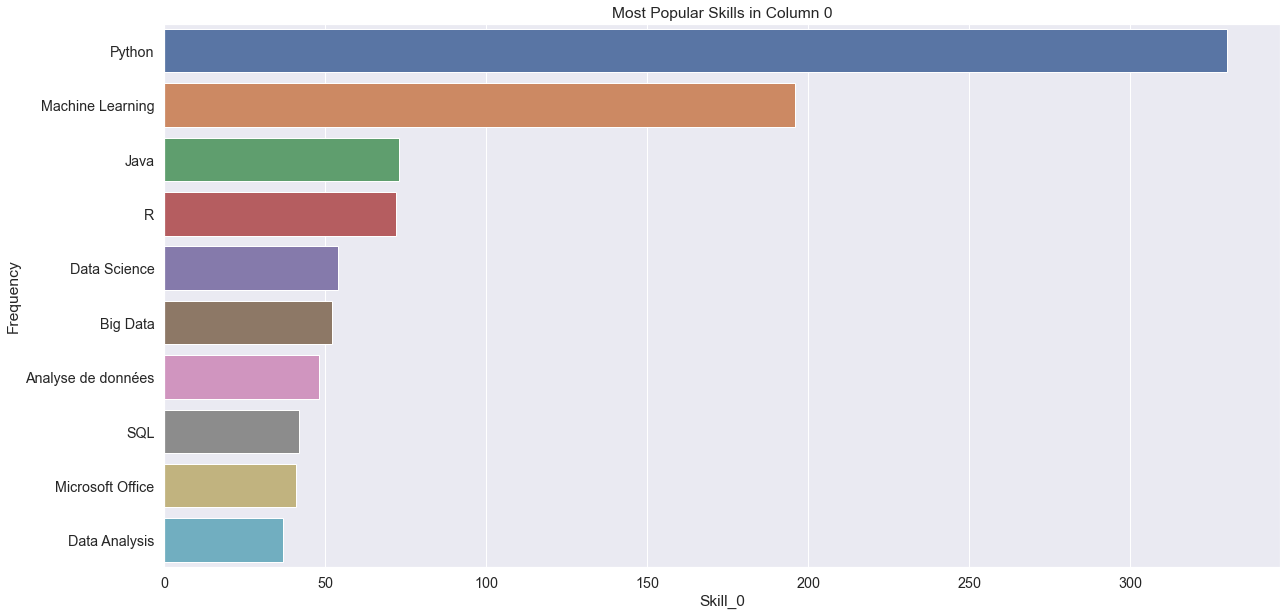

In [175]:
#Plotting Most frequency Skills - Skill_0 Column

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = skills['Skill_0'].value_counts().head(10), y=skills['Skill_0'].value_counts().head(10).index)
plt.ylabel('Frequency')
plt.title('Most Popular Skills in Column 0')
sns.set(font_scale=1.3)
plt.show()

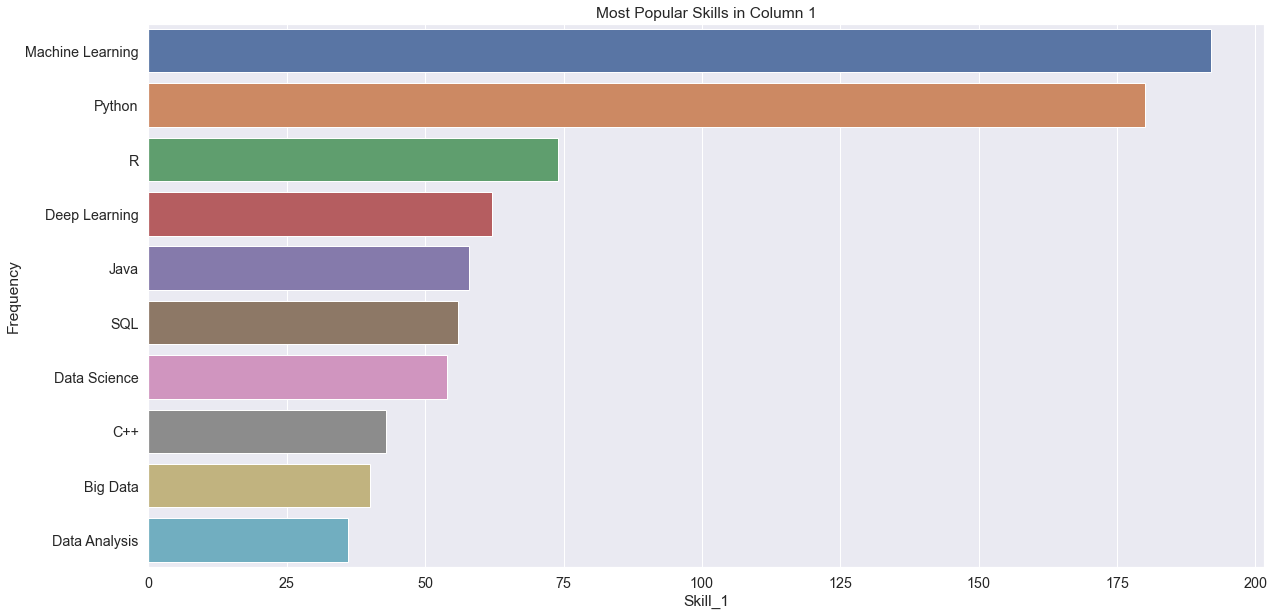

In [176]:
#Plotting Most frequency Skills - Skill_1 Column

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = skills['Skill_1'].value_counts().head(10), y=skills['Skill_1'].value_counts().head(10).index)
plt.ylabel('Frequency')
plt.title('Most Popular Skills in Column 1')
sns.set(font_scale=1.3)
plt.show()

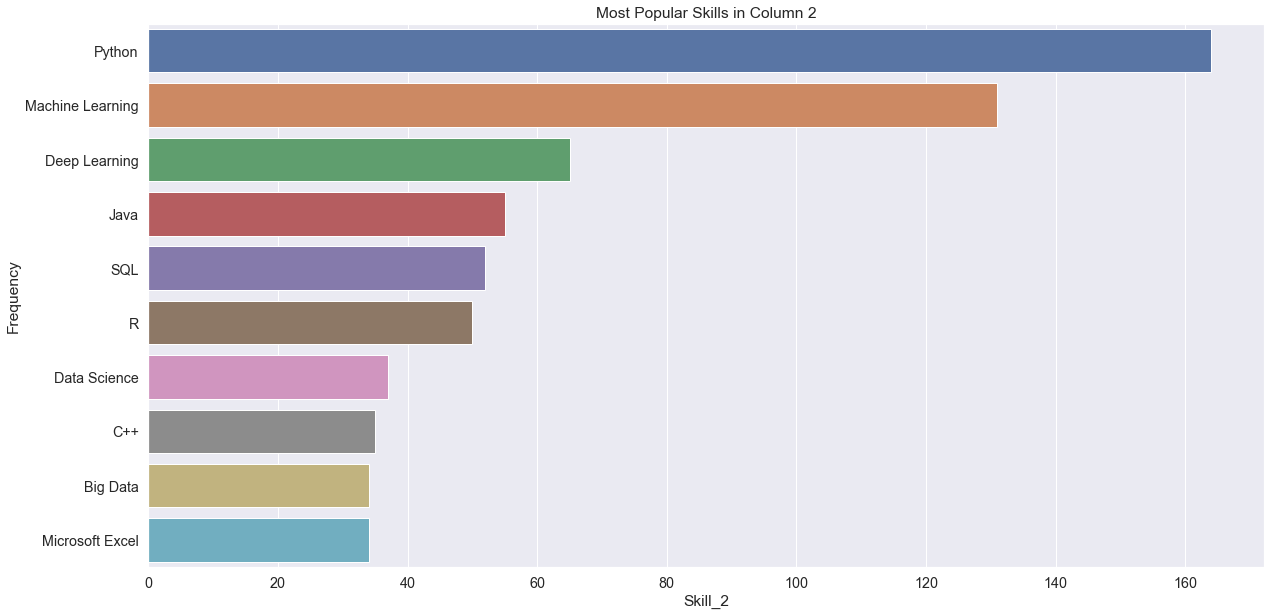

In [177]:
#Plotting Most frequency Skills - Skill_2 Column

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = skills['Skill_2'].value_counts().head(10), y=skills['Skill_2'].value_counts().head(10).index)
plt.ylabel('Frequency')
plt.title('Most Popular Skills in Column 2')
sns.set(font_scale=1.3)
plt.show()

---

- We can conclude that the 'Python' and 'Machine Learning' skills are mostly the first skills learned by the user.

---

In [178]:
data_frame['Relation'].value_counts()

500     1378
77         4
283        4
458        3
336        3
        ... 
322        1
4894       1
319        1
799        1
7          1
Name: Relation, Length: 342, dtype: int64

<AxesSubplot:title={'center':'Histogram of Relation'}, xlabel='Relation', ylabel='Frequency'>

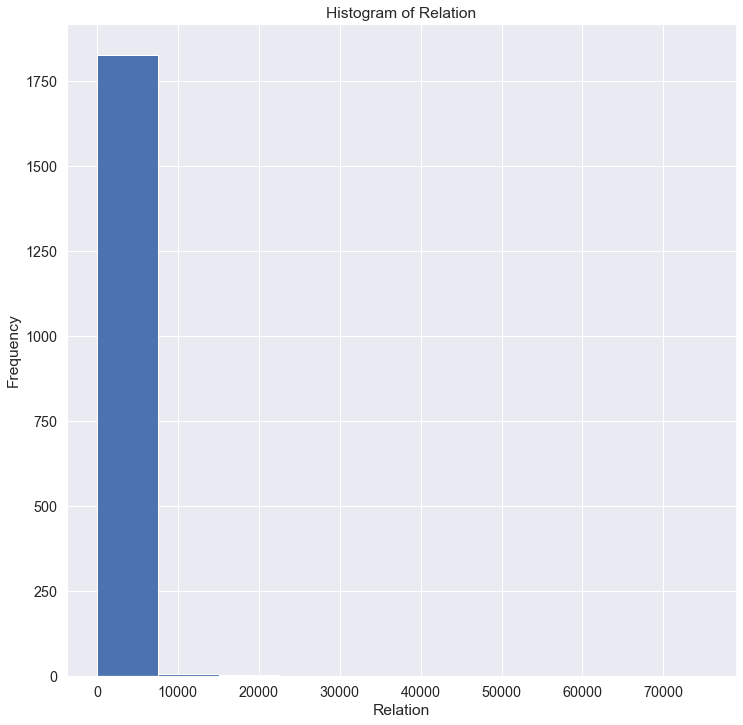

In [179]:
plt.title("Histogram of Relation")
plt.xlabel("Relation")
data_frame['Relation'].plot.hist()

---

### 1- Apriori Preparation

---

In [181]:
skills.shape

(1841, 50)

In [182]:
skill = []
for i in range(0, 1841):
    skill.append([str(skills.values[i,j]) for j in range(0, 50)])

skill = np.array(skill) # create numpy array
skill.shape # checking shape

(1841, 50)

In [184]:
#Using Transaction encoder

import mlxtend
from mlxtend.preprocessing import TransactionEncoder

trx_enc = TransactionEncoder()
te_array = trx_enc.fit(skill).transform(skill)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_array, columns=trx_enc.columns_)  #Creating a new DataFrame from our Numpy array


In [185]:
df.shape

(1841, 5907)

In [186]:
df.head()

,( sequence models (nlp,(deep learning (coursera from andrew ng,(serial communication(uart-spi-i2c-can controller,.NET,.NET Core,.NET Framework,.NET framework,.Net core,.c#,.net,...,大数据分析,推荐系统,数据挖掘,数据科学,数据管理,机器学习,深度学习,算法,自然语言处理,软件开发
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
df.apply(pd.Series.value_counts)

,( sequence models (nlp,(deep learning (coursera from andrew ng,(serial communication(uart-spi-i2c-can controller,.NET,.NET Core,.NET Framework,.NET framework,.Net core,.c#,.net,...,大数据分析,推荐系统,数据挖掘,数据科学,数据管理,机器学习,深度学习,算法,自然语言处理,软件开发
False,1840,1840,1840,1823,1838,1819,1783,1840,1840,1839,...,1840,1840,1840,1839,1840,1838,1840,1840,1840,1840
True,1,1,1,18,3,22,58,1,1,2,...,1,1,1,2,1,3,1,1,1,1


In [188]:
df.drop('None', axis = 1, inplace= True)
df.shape

(1841, 5906)

In [189]:
#Describe Dataset
skills.describe()

,Skill_0,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,...,Skill_40,Skill_41,Skill_42,Skill_43,Skill_44,Skill_45,Skill_46,Skill_47,Skill_48,Skill_49
count,1841,1837,1833,1825,1818,1768,1739,1706,1668,1625,...,272,253,233,217,205,184,163,138,111,80
unique,372,457,510,427,501,534,545,573,571,560,...,208,193,195,167,168,139,129,116,88,67
top,Python,Machine Learning,Python,Machine Learning,Machine Learning,Machine Learning,Machine Learning,Machine Learning,SQL,Python,...,Leadership,Apache Spark,Natural Language Processing (NLP),Apache Spark,Apache Spark,Apache Spark,Data Analytics,Apache Spark,Apache Spark,Machine Learning Algorithms
freq,330,192,164,157,110,86,63,46,54,55,...,8,10,5,5,7,9,5,4,6,4


In [190]:
#Most 60 Chosen Skills
skills['Skill_20'].value_counts().head(60)

SQL                                  26
Python                               25
JavaScript                           25
MySQL                                21
PHP                                  20
HTML                                 18
R                                    18
Linux                                17
Hadoop                               14
Java                                 14
Management                           13
C++                                  13
Microsoft SQL Server                 12
Matlab                               12
Microsoft Office                     11
Apache Spark                         11
Git                                  10
NoSQL                                10
MongoDB                              10
TensorFlow                            9
C#                                    9
PL/SQL                                8
C                                     8
Microsoft Excel                       8
Leadership                            8


In [118]:
new_data = skills['Skill_7'].value_counts().head(250).index.tolist()

In [119]:
new_data

['Machine Learning',
 'Python',
 'SQL',
 'Java',
 'Big Data',
 'Deep Learning',
 'Data Analysis',
 'Data Science',
 'C++',
 'Data Mining',
 'Intelligence Artificielle',
 'R',
 'JavaScript',
 'Microsoft Excel',
 'Linux',
 'Gestion de projet',
 'C',
 'Project Management',
 'MySQL',
 'Matlab',
 'Microsoft Office',
 'Statistics',
 'Analyse de données',
 'Scrum',
 'Software Development',
 'Statistiques',
 'Visualisation de données',
 'Data Visualization',
 'MongoDB',
 'Exploration des données',
 'Image Processing',
 'Microsoft Word',
 'PHP',
 'MATLAB',
 'Hadoop',
 'Data Warehouse',
 'PL/SQL',
 'Computer Vision',
 'C#',
 'Git',
 'HTML',
 'Statistical Data Analysis',
 'HTML5',
 'Research',
 'Algorithms',
 'Business Intelligence',
 'Programmation',
 'SAS',
 'Microsoft SQL Server',
 'Mathematics',
 'Statistical Modeling',
 'Développement web',
 'Extract, Transform, Load (ETL)',
 'Méthodes agiles',
 'Data Warehousing',
 'Web Development',
 'Vision par ordinateur',
 'Recherche',
 'Agile Methodolo

In [192]:
df = df.loc[:,new_data]
df

,Machine Learning,Python,SQL,Java,Big Data,Deep Learning,Data Analysis,Data Science,C++,Data Mining,...,graph database,deeplearning,Java Database Connectivity (JDBC),Community Service,Publicité en ligne,Audit Technique,hadoop,ELK Stack,Akka,Suite des protocoles Internet (TCP/IP)
0,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,True,True,True,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1837,True,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1838,True,True,True,True,True,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1839,True,True,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


---

### 2- Support with Itemsets

---

In [193]:
df.head()

,Machine Learning,Python,SQL,Java,Big Data,Deep Learning,Data Analysis,Data Science,C++,Data Mining,...,graph database,deeplearning,Java Database Connectivity (JDBC),Community Service,Publicité en ligne,Audit Technique,hadoop,ELK Stack,Akka,Suite des protocoles Internet (TCP/IP)
0,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [194]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets=apriori(df, min_support=0.2, use_colnames=True, verbose = 1,max_len=3) #Instead of column indices we can use column names.
frequent_itemsets.sort_values(by="support",ascending=False)

Processing 402 combinations | Sampling itemset size 3


,support,itemsets
1,0.791961,(Python)
0,0.579576,(Machine Learning)
2,0.579576,(SQL)
17,0.547529,"(Machine Learning, Python)"
25,0.502988,"(SQL, Python)"
3,0.453015,(Java)
26,0.385660,"(Java, Python)"
9,0.381315,(R)
18,0.378599,"(Machine Learning, SQL)"
41,0.365562,"(SQL, Machine Learning, Python)"


---

### 3- Confidence

---

In [215]:
from mlxtend.frequent_patterns import association_rules

df_ar = association_rules(frequent_itemsets, metric="confidence" , min_threshold=0.8) # associate itemsets with confidence over 50%.
df_ar.sort_values(by="confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(Machine Learning, SQL)",(Python),0.378599,0.791961,0.365562,0.965567,1.219210,0.065727,6.041802
15,"(Machine Learning, Java)",(Python),0.274851,0.791961,0.265073,0.964427,1.217771,0.047402,5.848211
22,"(Machine Learning, R)",(Python),0.256382,0.791961,0.247148,0.963983,1.217210,0.044103,5.776145
16,"(Machine Learning, Deep Learning)",(Python),0.266160,0.791961,0.254753,0.957143,1.208573,0.043965,4.854246
19,"(Data Science, Machine Learning)",(Python),0.218903,0.791961,0.208582,0.952854,1.203157,0.035220,4.412619
6,(Deep Learning),(Python),0.289517,0.791961,0.274307,0.947467,1.196356,0.045022,3.960173
0,(Machine Learning),(Python),0.579576,0.791961,0.547529,0.944705,1.192868,0.088527,3.762334
7,(Data Science),(Python),0.258555,0.791961,0.242803,0.939076,1.185760,0.038037,3.414711
17,"(Deep Learning, Python)",(Machine Learning),0.274307,0.579576,0.254753,0.928713,1.602400,0.095771,5.897610
1,(Deep Learning),(Machine Learning),0.289517,0.579576,0.266160,0.919325,1.586201,0.098363,5.211298


---

### 4- Lift

---

In [224]:
ar = association_rules(frequent_itemsets,metric="lift",min_threshold=1).sort_values(by="lift",ascending=False)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,(Deep Learning),"(Machine Learning, Python)",0.289517,0.547529,0.254753,0.879925,1.607085,0.096234,3.768239
61,"(Machine Learning, Python)",(Deep Learning),0.547529,0.289517,0.254753,0.465278,1.607085,0.096234,1.328696
63,(Machine Learning),"(Deep Learning, Python)",0.579576,0.274307,0.254753,0.439550,1.602400,0.095771,1.294839
62,"(Deep Learning, Python)",(Machine Learning),0.274307,0.579576,0.254753,0.928713,1.602400,0.095771,5.897610
6,(Machine Learning),(Deep Learning),0.579576,0.289517,0.266160,0.459231,1.586201,0.098363,1.313840
...,...,...,...,...,...,...,...,...,...
56,"(Machine Learning, Python)",(Java),0.547529,0.453015,0.265073,0.484127,1.068678,0.017035,1.060310
36,(MySQL),(Python),0.274851,0.791961,0.229223,0.833992,1.053072,0.011552,1.253188
37,(Python),(MySQL),0.791961,0.274851,0.229223,0.289438,1.053072,0.011552,1.020529
4,(Machine Learning),(Java),0.579576,0.453015,0.274851,0.474227,1.046824,0.012294,1.040345


In [257]:
ar[(ar['lift'] > 1.4) & (ar['confidence'] > 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,(Deep Learning),"(Machine Learning, Python)",0.289517,0.547529,0.254753,0.879925,1.607085,0.096234,3.768239
62,"(Deep Learning, Python)",(Machine Learning),0.274307,0.579576,0.254753,0.928713,1.602400,0.095771,5.897610
7,(Deep Learning),(Machine Learning),0.289517,0.579576,0.266160,0.919325,1.586201,0.098363,5.211298
67,"(Data Science, Python)",(Machine Learning),0.242803,0.579576,0.208582,0.859060,1.482221,0.067860,2.983006
69,(Data Science),"(Machine Learning, Python)",0.258555,0.547529,0.208582,0.806723,1.473389,0.067016,2.341048
8,(Data Science),(Machine Learning),0.258555,0.579576,0.218903,0.846639,1.460789,0.069050,2.741393


In [250]:
ar.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,(Deep Learning),"(Machine Learning, Python)",0.289517,0.547529,0.254753,0.879925,1.607085,0.096234,3.768239
61,"(Machine Learning, Python)",(Deep Learning),0.547529,0.289517,0.254753,0.465278,1.607085,0.096234,1.328696
63,(Machine Learning),"(Deep Learning, Python)",0.579576,0.274307,0.254753,0.439550,1.602400,0.095771,1.294839
62,"(Deep Learning, Python)",(Machine Learning),0.274307,0.579576,0.254753,0.928713,1.602400,0.095771,5.897610
6,(Machine Learning),(Deep Learning),0.579576,0.289517,0.266160,0.459231,1.586201,0.098363,1.313840
7,(Deep Learning),(Machine Learning),0.289517,0.579576,0.266160,0.919325,1.586201,0.098363,5.211298
67,"(Data Science, Python)",(Machine Learning),0.242803,0.579576,0.208582,0.859060,1.482221,0.067860,2.983006
70,(Machine Learning),"(Data Science, Python)",0.579576,0.242803,0.208582,0.359888,1.482221,0.067860,1.182913
69,(Data Science),"(Machine Learning, Python)",0.258555,0.547529,0.208582,0.806723,1.473389,0.067016,2.341048
68,"(Machine Learning, Python)",(Data Science),0.547529,0.258555,0.208582,0.380952,1.473389,0.067016,1.197719


In [225]:
ar.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.500860,0.500860,0.270211,0.604388,1.217830,0.044439,1.717196
std,0.186010,0.186010,0.072492,0.217891,0.140975,0.021403,1.212033
min,0.218903,0.218903,0.202064,0.263374,1.046824,0.011552,1.020529
25%,0.320478,0.320478,0.225828,0.422446,1.124257,0.026842,1.105784
50%,0.525258,0.525258,0.254753,0.627336,1.194612,0.042541,1.221458
75%,0.579576,0.579576,0.277023,0.813540,1.238537,0.050248,1.547665
max,0.791961,0.791961,0.547529,0.965567,1.607085,0.098363,6.041802


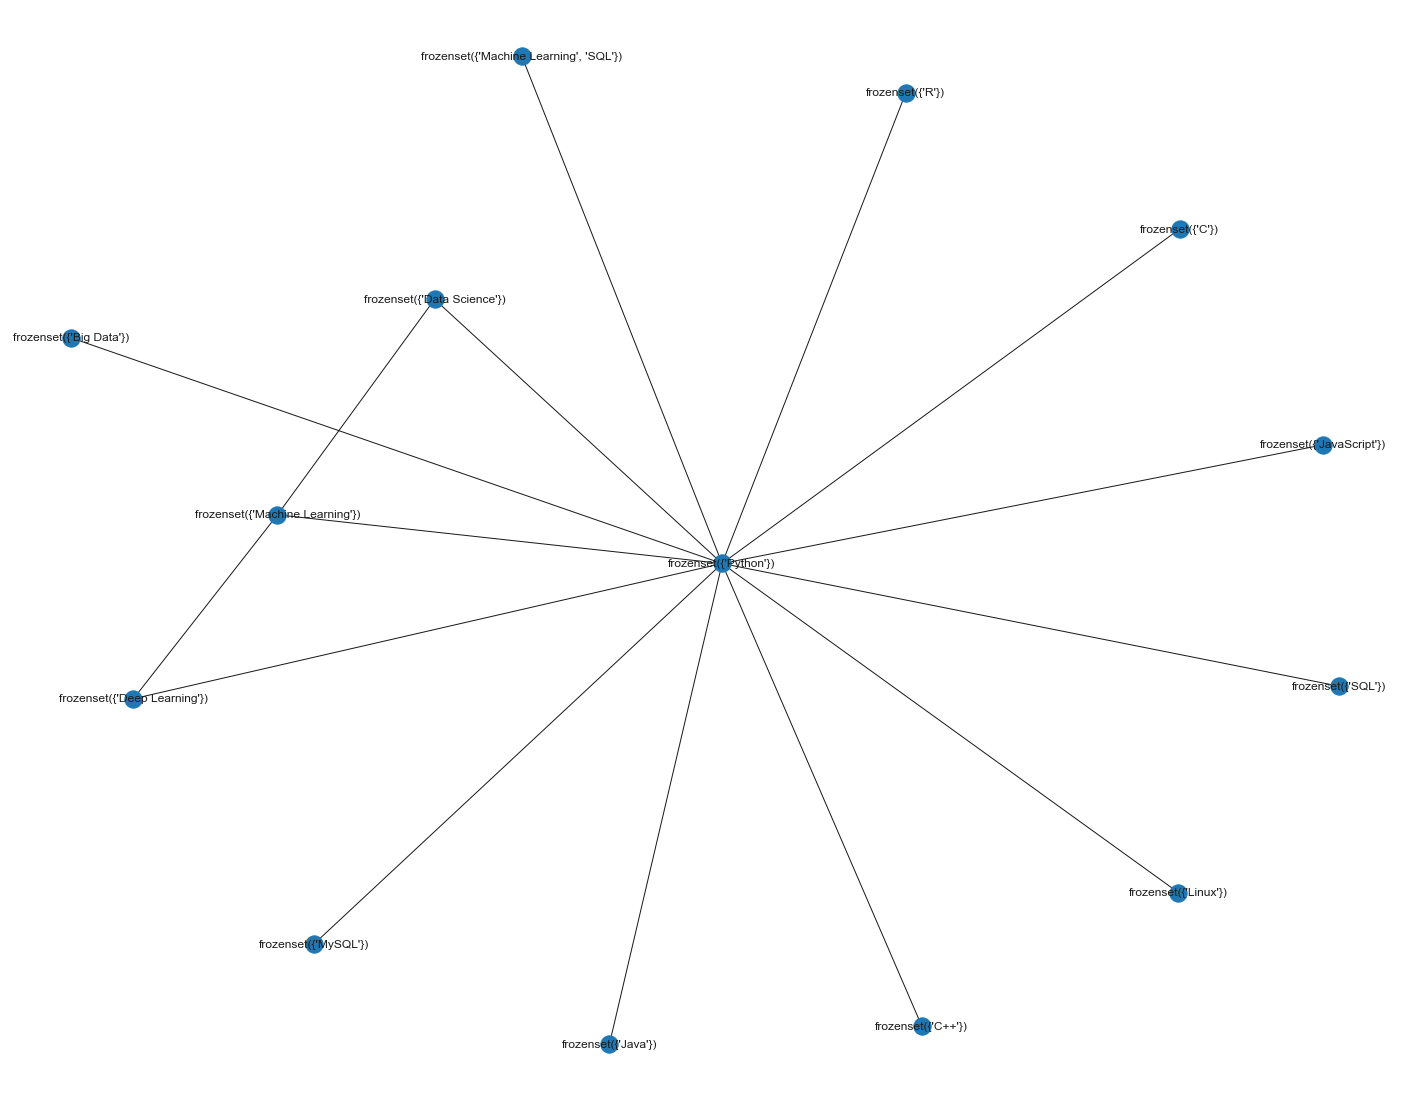

In [249]:
import networkx as nx
fig, ax=plt.subplots(figsize=(25,20))
GA=nx.from_pandas_edgelist(df_ar.head(15),source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()